## 1. Calculate the bond price given an interest rate term structure and measure the interest rate risk

In [13]:
import numpy as np

# Inputs
cr = 0.05  # 5% annual coupon rate
FV = 1000  # Face value of the bond
T = 5      # Time to maturity in years
r = np.array([0.051, 0.0511, 0.05112, 0.0513, 0.0514])  # Interest rate curve

In [15]:
## Calculate Coupon Payments
C = cr * FV
print(f"Coupon Payment: {C}")

Coupon Payment: 50.0


In [17]:
## Create Cash Flow Array
cash_flows = np.full(T - 1, C)  # T-1 coupon payments
cash_flows = np.append(cash_flows, C + FV)  # Add final payment
print(f"Cash Flows: {cash_flows}")

cash_flows = np.full(T - 1, C)  # T-1 coupon payments
cash_flows = np.append(cash_flows, C + FV)  # Add final payment
print(f"Cash Flows: {cash_flows}")

Cash Flows: [  50.   50.   50.   50. 1050.]
Cash Flows: [  50.   50.   50.   50. 1050.]


In [19]:
## Calculate PV of Cash Flows

# Time periods
time_periods = np.arange(1, T + 1)

# Present value calculation
pv_cash_flows = cash_flows / (1 + r) ** time_periods
print(f"PV of Cash Flows: {pv_cash_flows}")

PV of Cash Flows: [ 47.5737393   45.2566009   43.05396024  40.93203593 817.23966229]


In [21]:
## Compute Bond Price

bond_price = np.sum(pv_cash_flows)
print(f"Bond Price: {bond_price}")

Bond Price: 994.0559986565285


## 2. Find the implicit YTM

In [24]:
pip install numpy-financial

Note: you may need to restart the kernel to use updated packages.


In [26]:
import numpy as np
import numpy_financial as npf

In [28]:
# Define Bond Cash Flows

# Inputs
cr = 0.05  # 5% annual coupon rate
FV = 1000  # Face value of the bond
T = 5      # Time to maturity in years
r = np.array([0.051, 0.0511, 0.05112, 0.0513, 0.0514])  # Interest rate curve

Cash Flows: [  50.   50.   50.   50. 1050.]
Bond Price: 994.0559986565285
Yield to Maturity (YTM): 0.051378


In [30]:
# Coupon Payment
C = cr * FV
print(f"Coupon Payment: {C}")

Coupon Payment: 50.0


In [32]:
# Cash Flows
cash_flows = np.full(T - 1, C)  # T-1 coupon payments
cash_flows = np.append(cash_flows, C + FV)  # Add final payment
print(f"Cash Flows: {cash_flows}")

Cash Flows: [  50.   50.   50.   50. 1050.]


In [34]:
# Bond Price (calculated previously)
time_periods = np.arange(1, T + 1)  # Time periods
pv_cash_flows = cash_flows / (1 + r) ** time_periods
bond_price = np.sum(pv_cash_flows)
print(f"Bond Price: {bond_price}")

Bond Price: 994.0559986565285


In [36]:
# YTM Calculation
ytm = npf.irr([-bond_price] + list(cash_flows))
print(f"Yield to Maturity (YTM): {ytm:.6f}")

Yield to Maturity (YTM): 0.051378


## 3. Compute Bond Duration

In [44]:
# Inputs
C = 50        # Annual coupon payment
FV = 1000     # Face value
T = 5         # Time to maturity
r = np.array([0.051, 0.0511, 0.05112, 0.0513, 0.0514])  # Interest rate curve

In [46]:
# Calculate Bond Price
cash_flows = np.full(T - 1, C)  # T-1 coupon payments
cash_flows = np.append(cash_flows, C + FV)  # Add final payment
time_periods = np.arange(1, T + 1)  # Time periods
pv_cash_flows = cash_flows / (1 + r) ** time_periods  # PV of cash flows
bond_price = np.sum(pv_cash_flows)
print(f"Bond Price: {bond_price}")

Bond Price: 994.0559986565285


In [48]:
# Calculate Weights
weights = pv_cash_flows / bond_price
print(f"Weights: {weights}")

Weights: [0.04785821 0.04552721 0.0433114  0.04117679 0.82212638]


In [50]:
# Multiply Weights by Time
weighted_times = time_periods * weights
print(f"Weighted Times: {weighted_times}")

Weighted Times: [0.04785821 0.09105443 0.12993421 0.16470716 4.11063191]


In [52]:
# Step 4: Compute Duration
duration = np.sum(weighted_times)
print(f"Duration: {duration}")

Duration: 4.5441859242214


## Calculate percentage changes in bond price

In [57]:
# New YTM array
new_ytm = np.array([0.048, 0.0421, 0.03912, 0.0353, 0.0274])

In [59]:
# Original YTM array
original_ytm = r  # The original YTM array
delta_ytm = new_ytm - original_ytm
print(f"Delta YTM: {delta_ytm}")

Delta YTM: [-0.003 -0.009 -0.012 -0.016 -0.024]


In [61]:
# Calculate percentage changes in bond price
percent_change = -duration * delta_ytm
print(f"Percentage Change in Bond Price: {percent_change}")

Percentage Change in Bond Price: [0.01363256 0.04089767 0.05453023 0.07270697 0.10906046]


## Plot the rates curve

In [64]:
import matplotlib.pyplot as plt

In [66]:
# Define time periods and interest rates
time_periods = np.arange(1, len(r) + 1)  # Time periods (1 to T)
r = np.array([0.051, 0.0511, 0.05112, 0.0513, 0.0514])  # Interest rate curve

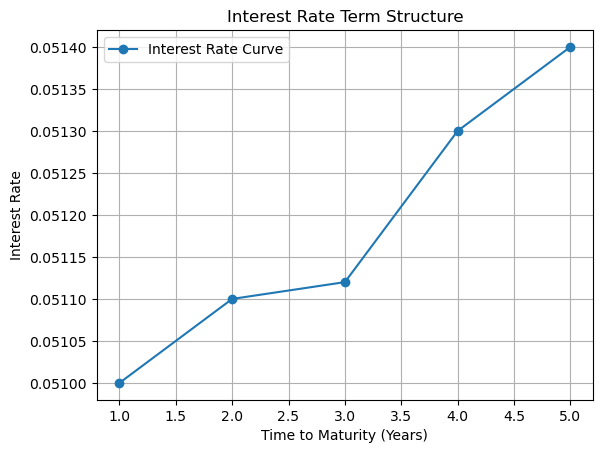

In [72]:
# Plot the interest rate curve
plt.plot(time_periods, r, marker='o', linestyle='-', label='Interest Rate Curve')

# Add labels and title
plt.title("Interest Rate Term Structure")
plt.xlabel("Time to Maturity (Years)")
plt.ylabel("Interest Rate")
plt.grid(True)
plt.legend()

# Display the plot
plt.show()